<h1>US Medical Insurance Cost Analysis</h1> 

<h3>Introduction</h3>
This project utilises the US Medical Insurance dataset, which contains demographic, lifestyle and health related information of over 1000 individuals. The dataset includes variables such as age, sex, body mass index (BMI), number of children, smoker status, region as well as their insurance charges. These variables can be used by insurers to assess medical risk and estimate insurance costs for new customers.

The aim of this project is to analyse the dataset by exploring how each variable is distributed within the dataset as well as to identify which characteristics are most strongly associated with higher or lower medical charges. This analysis can highlight trends in the data and reveal factors that may influence insurance pricing.
<h4>Skills used in this analysis</h4>
<ul>
 <li>Handling csv data</li>
 <li>Exploratory data analysis: Generating summary statistics for each variable</li>
 <li>Data visualisation with matplotlib</li>
 <li>Statistical Computation: Calculating min, max, avg</li>
 </ul>

<h3>Opening the file containing the dataset</h3>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

file = []
with open("insurance.csv") as open_file:
    read_file = csv.DictReader(open_file)
    for row in read_file:
        file.append(row)

<h4>Defining functions</h4>

In [157]:
#Count the number of records for a specific variable
def counter_string(varkey,vardict):
    keylist = list(vardict)
    for record in file:
        if record[varkey] in vardict:
            vardict[record[varkey]] += 1
    return vardict

#Display the percentage distribution
def display_percentage(dictname,varname):
    dictval = list(dict.values())
    for n in range(len(values)):
        print(f"The percentage of {varname[n]} in the records is {dictval[n]/len(file)*100:.2f}%.")
        
#Display the minimum and maximum value for a variable
def show_min_max(varkey,unit,varname):
    minmaxlist = [float(record[varkey]) for record in file]
    print(f"The {varname} for this data set is between {round(min(minmaxlist))} and {round(max(minmaxlist))} {unit}.")

#Defining a function to print out the minimum and maximum insurance cost for a variable
def show_min_max_avg_cost(varlist,varname):
    print(f"The lowest insurance cost for {varname} is ${round(min(varlist),2)} and the highest insurance cost for {varname} is ${round(max(varlist),2)}.")
    average = sum(varlist) / len(varlist)
    print(f"The average insurance cost for {varname} is ${round(average,2)}.")

#Defining a function to plot a pie graph
def plot_pie(vardict,title):
    plt.pie(vardict.values(), labels=vardict.keys(), autopct='%1.1f%%')
    plt.title(title)
    plt.show()

#Defining a function to plot a box plot
def plot_box(varlist, labellist, title, xlabel):
    boxplot = plt.boxplot(varlist, tick_labels = labellist, showmeans = True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Insurance cost in USD")
    plt.show()

<h2>Overview: About this dataset</h2>
This dataset contains insurance records which contain information on individual's:
<ul>
 <li>Age</li>
 <li>Sex</li>
 <li>BMI (Body Mass Index)</li>
 <li>Number of children</li>
 <li>Smoker status</li>
 <li>Region</li>
 <li>Insurance costs (Charges)</li>
 </ul>

<h4>Total number of records in the dataset</h4>

In [158]:
print(f"There are {len(file)} records in this dataset.")

There are 1338 records in this dataset.


<h4>Age range of the records in the dataset</h4>


In [131]:
show_min_max("age","years old","age range")

The age range for this data set is between 18 and 64 years old.


Since the age range of the records in the dataset are within the age range for adults, we can further categorise the records into the following age groups:
<ul>
 <li>Young Adult: 18-24 years old</li>
 <li>Adult: 25-44 years old</li>
 <li>Middle-aged Adult: 45-64 years old</li>
 </ul>

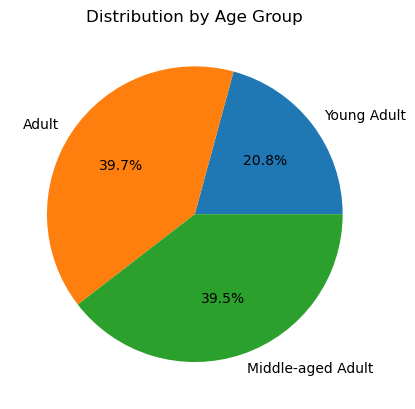

In [132]:
num_agecat = {"Young Adult":0,"Adult":0,"Middle-aged Adult":0}

for record in file:
    age = float(record["age"])
    if age < 25:
        age_cat["Young Adult"] += 1
    elif age < 45:
        age_cat["Adult"] += 1
    else:
        age_cat["Middle-aged Adult"] += 1

plot_pie(numcat,"Distribution by Age Group")

<h4>Distribution of records by sex</h4>

In [133]:
num_sex = {"male":0, "female":0}
percentage_sex = counter_string("sex",num_sex)
sex_labels = ["males", "females"]
display_percentage(percentage_sex,sex_labels)

The percentage of males in the records is 50.52%.
The percentage of females in the records is 49.48%.


<h4>Distribution of records by weight category</h4>
BMI can be used to categorise individuals into weight categories such as healthy weight, underweight, overweight and obese.
According to the US Centers for Disease Control and Prevention, the weight categories are defined as:
<ul>
 <li>Underweight: <18.4 kg/m2</li>
 <li>Healthy weight: 18.5 - <25 kg/m2</li>
 <li>Overweight: 25 - <30 kg/m2</li>
 <li>Obese: >=30 kg/m2</li>
 </ul>

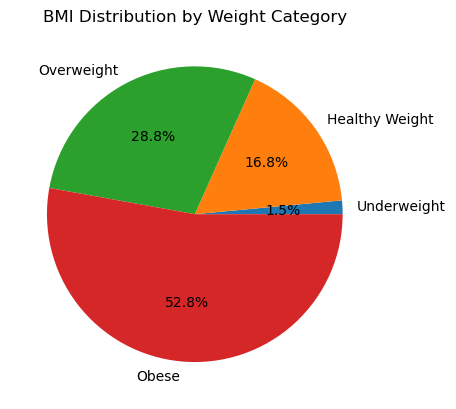

In [134]:
num_weightcat = {"Underweight":0,"Healthy Weight":0,"Overweight":0,"Obese":0}

for record in file:
    bmi= float(record["bmi"])
    if bmi < 18.4:
        num_weightcat["Underweight"] += 1
    elif bmi < 25:
        num_weightcat["Healthy Weight"] += 1
    elif bmi < 30:
        num_weightcat["Overweight"] += 1
    else:
        num_weightcat["Obese"] += 1

plot_pie(num_weightcat,"BMI Distribution by Weight Category")

<h4>Distribution of records with and without children</h4>

In [135]:
num_children = {"no children":0, "children":0}
for record in file:
    if float(record["children"]) == 0 :
        num_children["no children"] += 1
    else:
        num_children["children"] += 1
children_labels = ["records without children", "records with children"]
display_percentage(num_children, children_labels)

The percentage of records without children in the records is 42.90%.
The percentage of records with children in the records is 57.10%.


<h4>Distribution of smokers vs non-smokers</h4>

In [136]:
num_smoker = {"smoker":0,"non-smoker":0}
for record in file:
    if record["smoker"] == "yes":
        num_smoker["smoker"] += 1
    else:
        num_smoker["non-smoker"] += 1
smoker_labels = ["smokers", "non-smokers"]
display_percentage(num_smoker, smoker_labels)

The percentage of smokers in the records is 20.48%.
The percentage of non-smokers in the records is 79.52%.


<h4>Distribution of records by region</h4>
The records in the dataset are from 4 main regions: Northeast, Northwest, Southeast and Southwest.

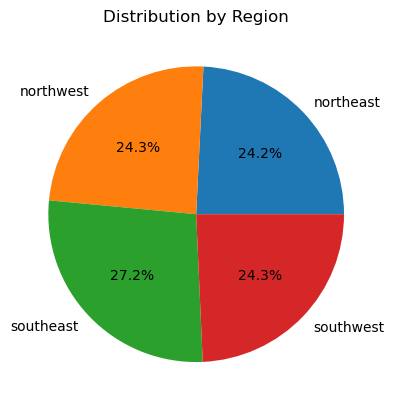

In [161]:
num_regioncat = {"northeast":0,"northwest":0,"southeast":0,"southwest":0}
percentage_regioncat = counter_string("region",num_regioncat)
plot_pie(percentage_regioncat,"Distribution by Region")

<h2>Analysis of insurance cost

<h4>Overview of insurance costs

In [141]:
show_min_max("charges","dollars","cost range")

The cost range for this data set is between 1122 and 63770 dollars.


<h4>Comparing Insurance Costs by Age Group</h4>

The lowest insurance cost for young adults is $1121.87 and the highest insurance cost for young adults is $44501.4.
The average insurance cost for young adults is $9011.34.
The lowest insurance cost for adults is $2137.65 and the highest insurance cost for adults is $58571.07.
The average insurance cost for adults is $11714.47.
The lowest insurance cost for middle-aged adults is $7147.1 and the highest insurance cost for middle-aged adults is $63770.43.
The average insurance cost for middle-aged adults is $17070.49.


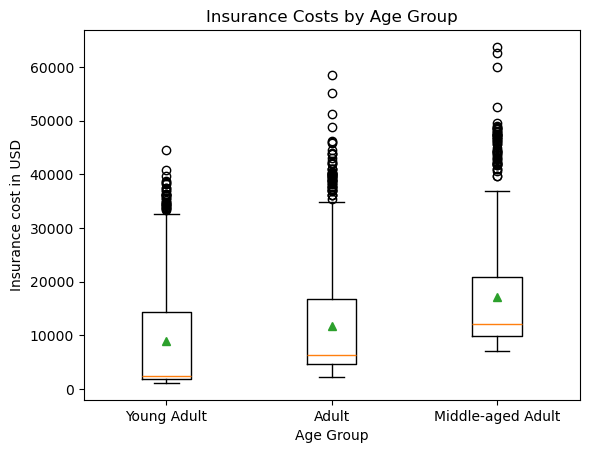

In [163]:
youngadult_cost = []
adult_cost = []
middleaged_cost = []

for record in file:
    age = float(record["age"])
    cost = float(record["charges"])
    if age < 25:
        youngadult_cost.append(cost)
    elif age < 45:
        adult_cost.append(cost)
    else:
        middleaged_cost.append(cost)

#Statistics for young adults
show_min_max_avg_cost(youngadult_cost,"young adults")

#Statistics for adults
show_min_max_avg_cost(adult_cost,"adults")

#Statistics for middle-aged adults
show_min_max_avg_cost(middleaged_cost,"middle-aged adults")

#Creating boxplot
plot_age = [youngadult_cost, adult_cost, middleaged_cost]
plot_age_labels = ["Young Adult", "Adult", "Middle-aged Adult"]
plot_box(plot_age, plot_age_labels, "Insurance Costs by Age Group", "Age Group")

<h4>Comparing Insurance Costs by Sex</h4>

The lowest insurance cost for males is $1121.87 and the highest insurance cost for males is $62592.87.
The average insurance cost for males is $13956.75.
The lowest insurance cost for females is $1607.51 and the highest insurance cost for females is $63770.43.
The average insurance cost for females is $12569.58.


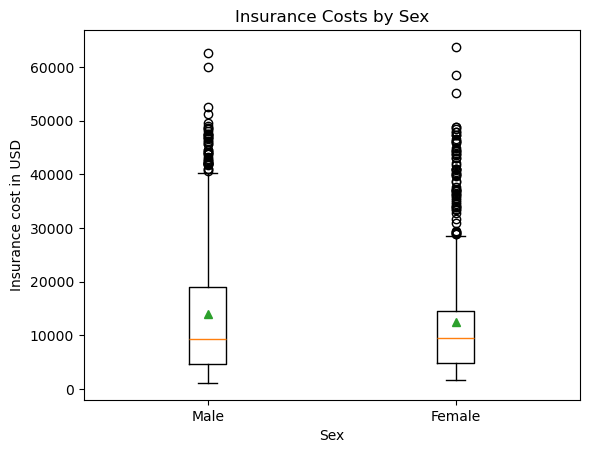

In [164]:
male_cost = []
female_cost = []

for record in file:
    cost = float(record["charges"])
    if record["sex"] == "male":
        male_cost.append(cost)
    else:
        female_cost.append(cost)
        
#Statistics for males
show_min_max_avg_cost(male_cost,"males")

#Statistics for females
show_min_max_avg_cost(female_cost,"females")

#Creating boxplot
plot_sex = [male_cost, female_cost]
sex_labels = ["Male", "Female"]
plot_box(plot_sex, sex_labels, "Insurance Costs by Sex", "Sex")

<h4>Comparing Insurance Costs by Weight Category</h4>

The lowest insurance cost for underweight records is $1621.34 and the highest insurance cost for underweight records is $32734.19.
The average insurance cost for underweight records is $8852.2.
The lowest insurance cost for healthy weight records is $1121.87 and the highest insurance cost for healthy weight records is $35069.37.
The average insurance cost for healthy weight records is $10409.34.
The lowest insurance cost for overweight records is $1252.41 and the highest insurance cost for overweight records is $38245.59.
The average insurance cost for overweight records is $10987.51.
The lowest insurance cost for obese records is $1131.51 and the highest insurance cost for obese records is $63770.43.
The average insurance cost for obese records is $15552.34.


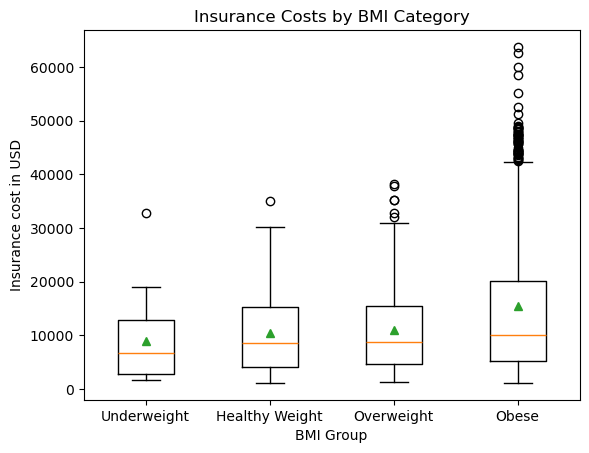

In [165]:
underweight_cost = []
healthy_cost = []
overweight_cost = []
obese_cost = []

for record in file:
    bmi= float(record["bmi"])
    cost = float(record["charges"])
    if bmi < 18.4:
        underweight_cost.append(cost)
    elif bmi < 25:
        healthy_cost.append(cost)
    elif bmi < 30:
        overweight_cost.append(cost)
    else:
        obese_cost.append(cost)

#Statistics for underweight records
show_min_max_avg_cost(underweight_cost,"underweight records")

#Statistics for healthy records
show_min_max_avg_cost(healthy_cost,"healthy weight records")

#Statistics for overweight records
show_min_max_avg_cost(overweight_cost,"overweight records")

#Statistics for obese records
show_min_max_avg_cost(obese_cost,"obese records")

#Creating boxplot
plot_bmi = [underweight_cost, healthy_cost, overweight_cost, obese_cost]
plot_bmi_labels = ["Underweight", "Healthy Weight", "Overweight", "Obese"]
plot_box(plot_bmi, plot_bmi_labels, "Insurance Costs by BMI Category", "BMI Group")

<h4>Comparing Insurance Costs by Smoker Status</h4>

The lowest insurance cost for smokers is $12829.46 and the highest insurance cost for smokers is $63770.43.
The average insurance cost for smokers is $32050.23.
The lowest insurance cost for non-smokers is $1121.87 and the highest insurance cost for non-smokers is $36910.61.
The average insurance cost for non-smokers is $8434.27.


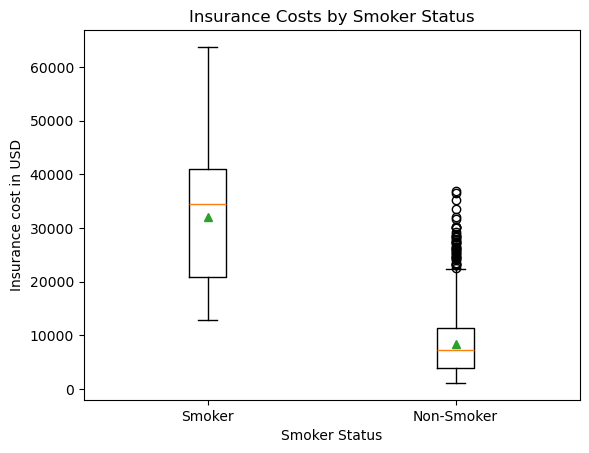

In [166]:
smoker_cost = []
nonsmoker_cost = []

for record in file:
    cost = float(record["charges"])
    if record["smoker"] == "yes":
        smoker_cost.append(cost)
    else:
        nonsmoker_cost.append(cost)
        
#Statistics for smokers
show_min_max_avg_cost(smoker_cost,"smokers")

#Statistics for non-smokers
show_min_max_avg_cost(nonsmoker_cost,"non-smokers")

#Creating boxplot
plot_smoker = [smoker_cost, nonsmoker_cost]
plot_smoker_labels = ["Smoker", "Non-Smoker"]
plot_box(plot_smoker, plot_smoker_labels, "Insurance Costs by Smoker Status", "Smoker Status")

<h4>Comparing Insurance Costs by Number of Children</h4>

The lowest insurance cost for records with children is $1711.03 and the highest insurance cost for records with children is $60021.4.
The average insurance cost for records with children is $13949.94.
The lowest insurance cost for records with no children is $1121.87 and the highest insurance cost for records with no children is $63770.43.
The average insurance cost for records with no children is $12365.98.


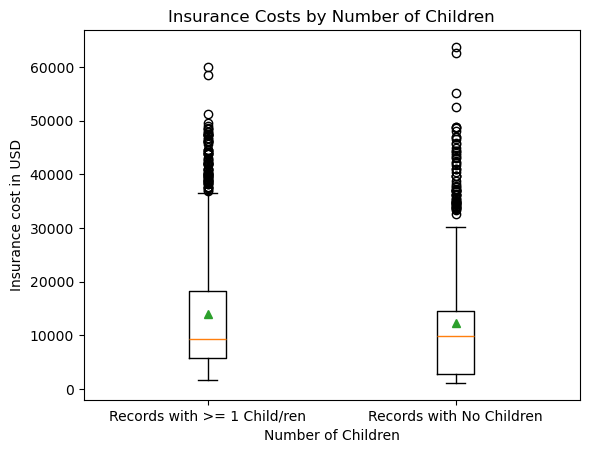

In [167]:
children_cost = []
nochildren_cost = []

for record in file:
    cost = float(record["charges"])
    if float(record["children"]) == 0:
        nochildren_cost.append(cost)
    else:
        children_cost.append(cost)
        
#Statistics for records with children
show_min_max_avg_cost(children_cost,"records with children")

#Statistics for records with no children
show_min_max_avg_cost(nochildren_cost,"records with no children")

#Creating boxplot
plot_children = [children_cost, nochildren_cost]
plot_children_labels = ["Records with >= 1 Child/ren", "Records with No Children"]
plot_box(plot_children, plot_children_labels, "Insurance Costs by Number of Children", "Number of Children")

<h3>Conclusion</h3>

Based on the analysis of the US Medical Insurance dataset, several variables show a strong relationship with the highest and lowest insurance costs:
<h5>Smoker status</h5>
<ul>
 <li>Smokers consistently show the highest medical insurance charges in the dataset, with both the maximum and average costs far exceeding those of non-smokers. This aligns with real-world expectations, as smoking greatly increases health risks and therefore insurance premiums.</li>
</ul>
<h5>BMI</h5>
<ul>
 <li>Individuals in the obese category generally face higher charges compared to healthy weight individuals. In contrast, those in the healthy weight group tend to have some of the lowest average insurance costs. Underweight individuals sometimes show higher variability, but their charges remain lower than obese individuals on average.</li>
</ul>
<h5>Age</h5>
<ul>
 <li>Middle-aged adults show significantly higher insurance charges than younger adults. Young adults typically fall into the range of lowest charges, reflecting lower health risks.</li>
</ul>
<h5>Sex and number of children</h5>
<ul>
 <li>While there are differences in insurance costs between individuals of different sexes and with different number of children, the differences are not as significant in affecting in the insurance costs compared to smoking, BMI and age.</li>
</ul>
<h4>Summary</h4>
The variables most strongly associated with higher insurance costs are:
<ul>
 <li>Being a smoker</li>
 <li>Being obese</li>
 <li>Being in the middle-aged age group</li>
</ul>
The variables most strongly associated with lower insurance costs are:
<ul>
 <li>Being a non-smoker</li>
 <li>Having a healthy BMI</li>
 <li>Being in the younger adult age range</li>
</ul>
These findings highlight how lifestyle and health-related factors play a major role in determining medical insurance expenses.